# **Logistic Regression model building**

**Done By:** *Mohamad Namroud*

**Dataset:** https://www.kaggle.com/datasets/mathchi/diabetes-data-set

## **About the dataset:** 

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Content**

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

# Goal:

To build a model doing better than **80%** Score

# Download the data

In [1]:
# Code to download the data if not downloaded and saving it in data folder
import kagglehub
from pathlib import Path
import shutil

data_dir = Path("data")
data_dir.mkdir(parents=True, exist_ok=True)

download_path = kagglehub.dataset_download("mathchi/diabetes-data-set")

for file in Path(download_path).iterdir():
    shutil.move(str(file), str(data_dir))

print("Dataset saved in:", data_dir.resolve())

Dataset saved in: C:\Users\Cursist\Desktop\python\My cases\data_science_cases\cases\Logistic_hr_dataset\data


# Loading, exploring and cleaning the data

In [2]:
import pandas as pd
df = pd.read_csv('data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df = df.drop_duplicates()

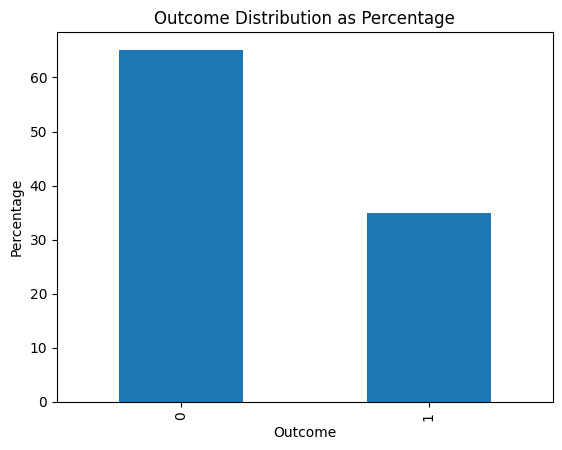

In [7]:
import matplotlib.pyplot as plt

outcome_percentage = df['Outcome'].value_counts() * 100 / len(df)
outcome_percentage.plot(kind='bar')


plt.title('Outcome Distribution as Percentage')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.show()

In [8]:
# Replacing 0 values in columns ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'] with NaN since they cannot be 0
import numpy as np
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [9]:
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [11]:
# Replacing NaN values with the median

columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

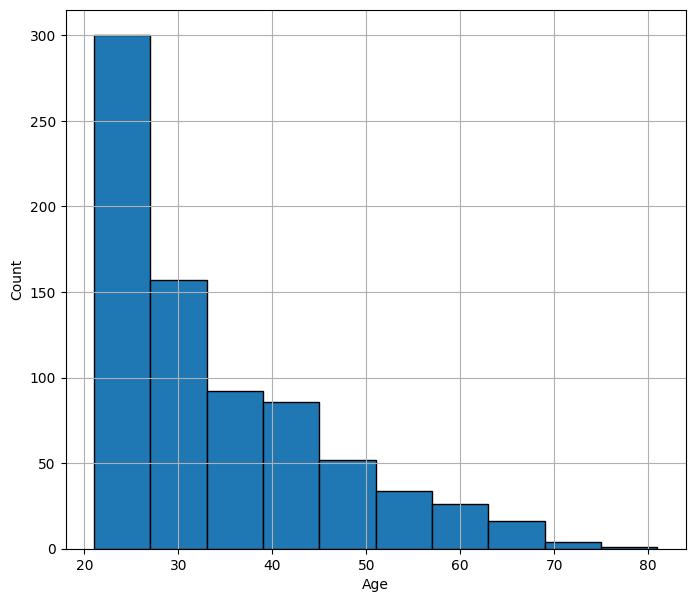

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

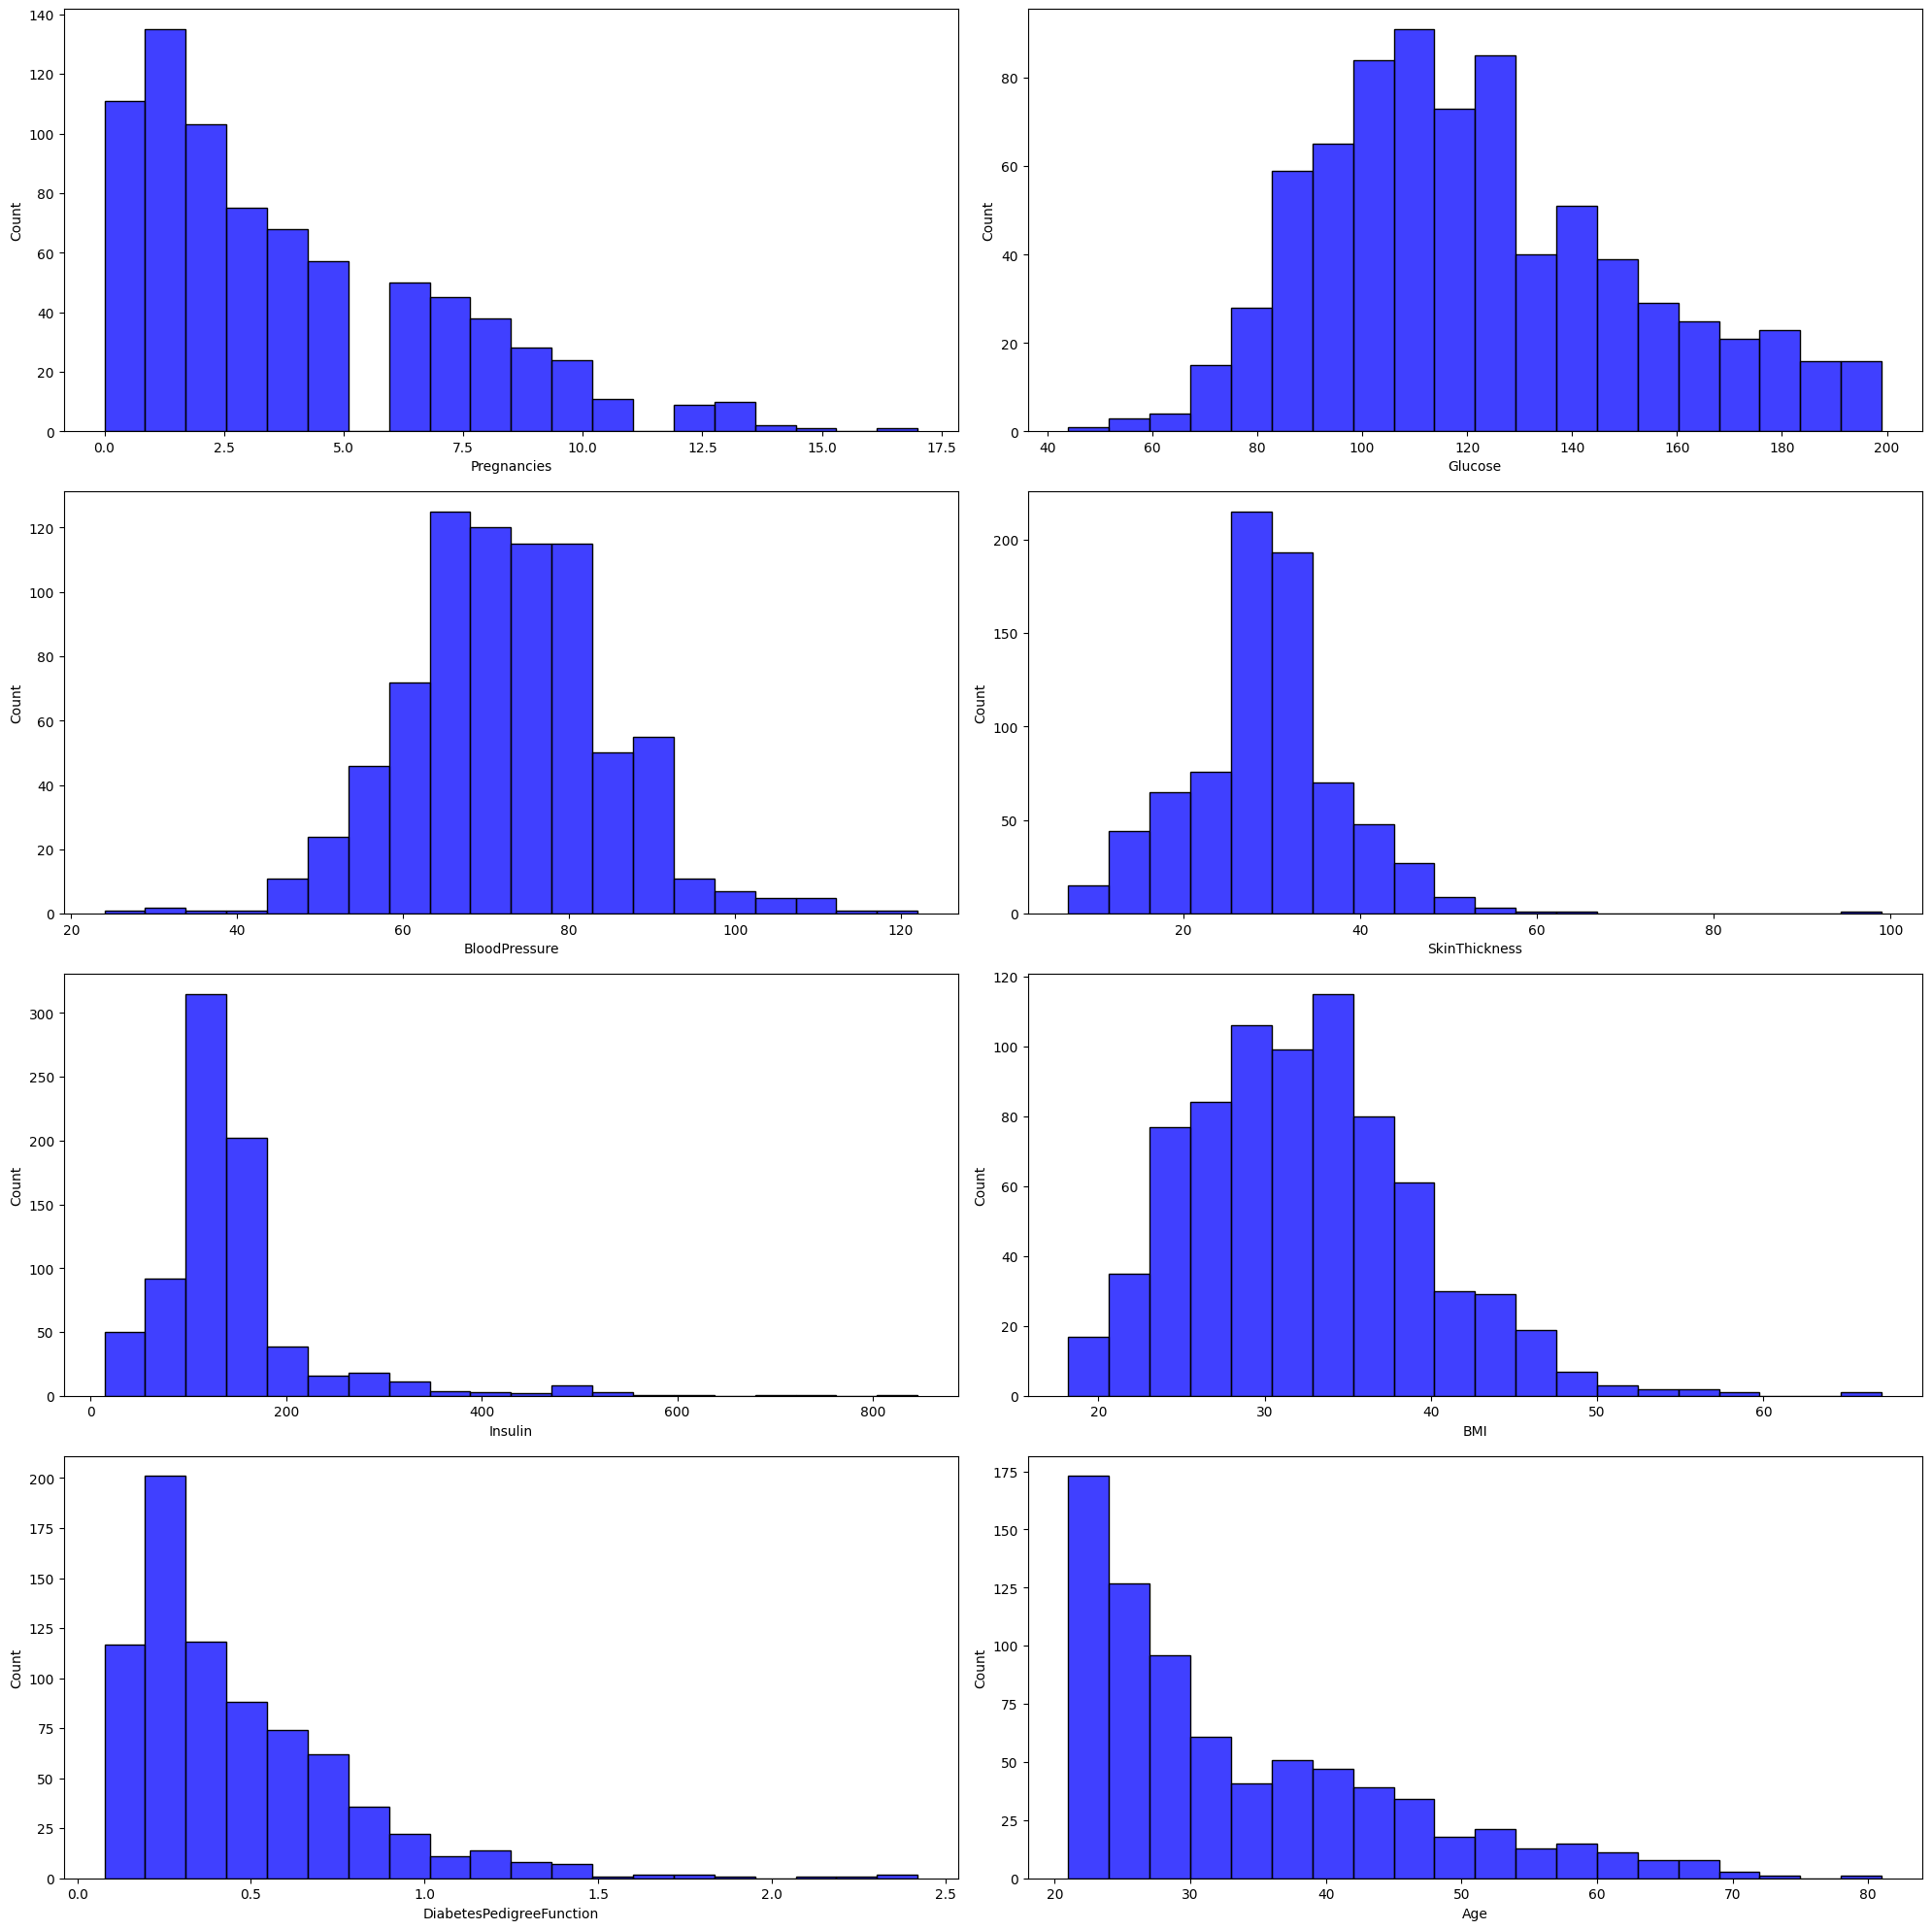

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 2, figsize=(20, 20))

sns.histplot(df.Pregnancies, bins=20, ax=ax[0, 0], color="blue")
sns.histplot(df.Glucose, bins=20, ax=ax[0, 1], color="blue")
sns.histplot(df.BloodPressure, bins=20, ax=ax[1, 0], color="blue")
sns.histplot(df.SkinThickness, bins=20, ax=ax[1, 1], color="blue")
sns.histplot(df.Insulin, bins=20, ax=ax[2, 0], color="blue")
sns.histplot(df.BMI, bins=20, ax=ax[2, 1], color="blue")
sns.histplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3, 0], color="blue")
sns.histplot(df.Age, bins=20, ax=ax[3, 1], color="blue")

plt.tight_layout()  # Add this line to ensure proper layout
plt.show()


In [15]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


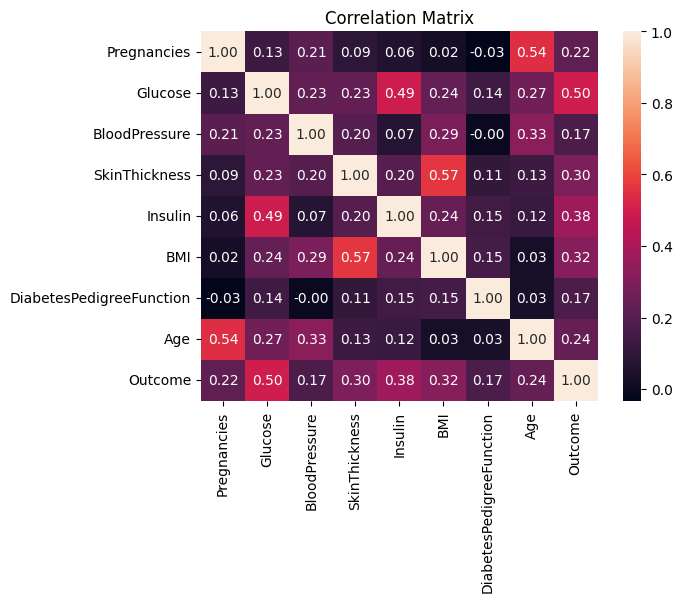

In [16]:
f,ax = plt.subplots()
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax)
ax.set_title("Correlation Matrix")
plt.show()

# Handling Outliers

In [17]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "Outliers detected")
    else:
        print(feature, "No outliers")

Pregnancies Outliers detected
Glucose No outliers
BloodPressure Outliers detected
SkinThickness Outliers detected
Insulin Outliers detected
BMI Outliers detected
DiabetesPedigreeFunction Outliers detected
Age Outliers detected
Outcome No outliers


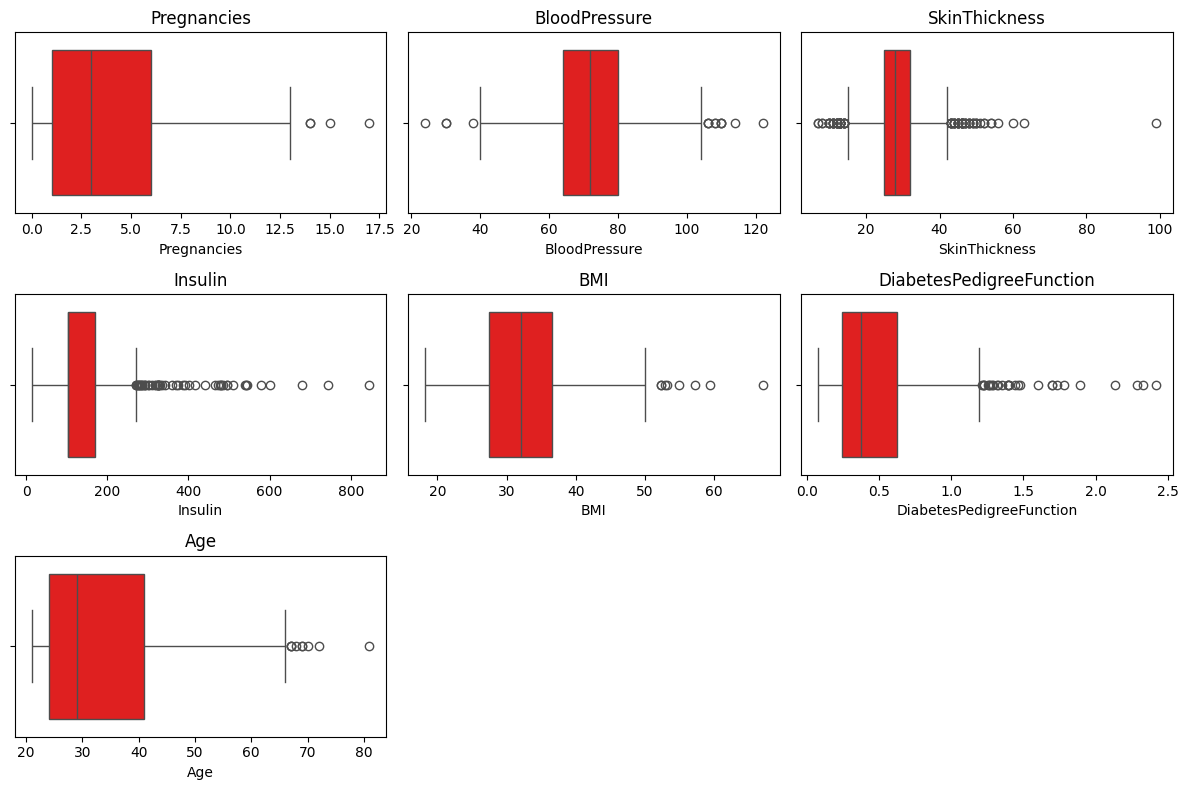

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Loop through each column to create a boxplot
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid of subplots
    sns.boxplot(x=df[column], color="red")
    plt.title(f"{column}")

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


In [19]:
# outliers removing

for feature in df:
    # Calculate IQR for each feature
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Check if outliers are present and cap them
    if df[(df[feature] > upper)].any(axis=None):
        # Ensure the column is of type float before assigning capped values
        df[feature] = df[feature].astype(float)
        df.loc[df[feature] > upper, feature] = upper
        print(f"Outliers in {feature} have been capped at {upper}")
    
    if df[(df[feature] < lower)].any(axis=None):
        df.loc[df[feature] < lower, feature] = lower
        print(f"Outliers in {feature} have been capped at {lower}")
    else:
        print(f"No outliers in {feature}")

Outliers in Pregnancies have been capped at 13.5
No outliers in Pregnancies
No outliers in Glucose
Outliers in BloodPressure have been capped at 104.0
Outliers in BloodPressure have been capped at 40.0
Outliers in SkinThickness have been capped at 42.5
Outliers in SkinThickness have been capped at 14.5
Outliers in Insulin have been capped at 270.0
No outliers in Insulin
Outliers in BMI have been capped at 50.25
No outliers in BMI
Outliers in DiabetesPedigreeFunction have been capped at 1.2
No outliers in DiabetesPedigreeFunction
Outliers in Age have been capped at 66.5
No outliers in Age
No outliers in Outcome


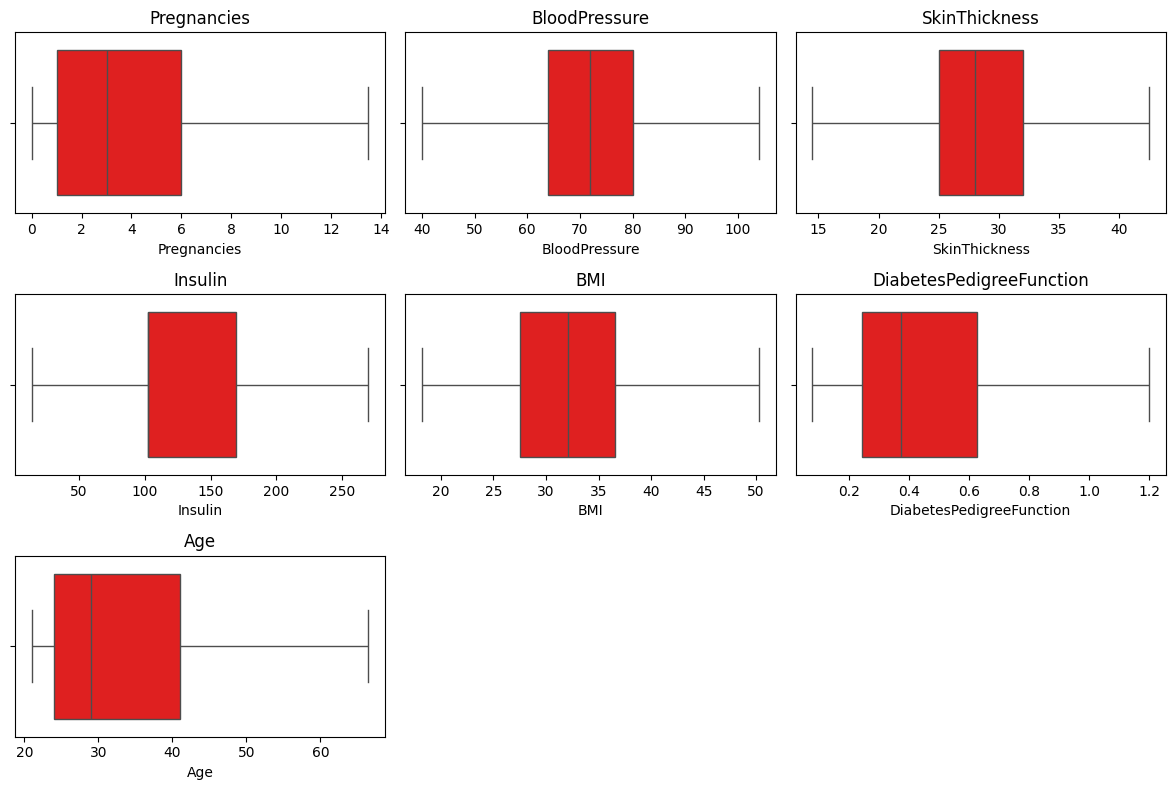

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Loop through each column to create a boxplot
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid of subplots
    sns.boxplot(x=df[column], color="red")
    plt.title(f"{column}")

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()

# Feature Engineering

In [21]:
# Adding new columns to enhance the model

NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [22]:
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"
    
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [23]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "High", "Overweight"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [24]:
df['BloodPressure_BMI'] = df['BloodPressure'] * df['BMI']

# Model Pipeline

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load data and separate features/target
y = df['Outcome']
X = df.drop('Outcome', axis=1)

# Define the columns that will be processed
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define the transformations for the numerical columns
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', RobustScaler())                   # Scale using RobustScaler
])

# Define the transformations for the categorical columns
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))      # One-Hot Encoding for categorical features
])

# Define the preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),  # Apply transformations to numerical columns
    ('cat', categorical_transformer, categorical_cols)  # Apply transformations to categorical columns
])

# Create a pipeline that includes the preprocessing and model fitting steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 1. Apply cross-validation BEFORE train-test split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# 2. Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Apply Standard Scaling after preprocessing (optional, if needed)
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Optional: Apply standard scaling after preprocessing
    ('classifier', LogisticRegression())
])

# 4. Train the model on the training set
final_pipeline.fit(X_train, y_train)

# 5. Evaluate on the test set
y_pred = final_pipeline.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred)

# Print results
print(f"Test set accuracy: {log_reg_acc}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-validation accuracy scores: [0.8961039  0.83116883 0.80519481 0.85714286 0.88311688 0.8961039
 0.81818182 0.85714286 0.80263158 0.84210526]
Mean cross-validation accuracy: 0.8488892686261107
Test set accuracy: 0.8896103896103896
Confusion Matrix:
 [[97 10]
 [ 7 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.80      0.85      0.82        47

    accuracy                           0.89       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.89      0.89       154

